In [1]:
# Demonstration of different matching prescriptions for a model of a qT-dependent observable

# W + Y : https://inspirehep.net/literature/298952 (for example)
# W*FO/ASY : https://arxiv.org/pdf/1905.05171.pdf (for example)
# weigthed average of W and FO : https://inspirehep.net/literature/1646273

# feel free to play with the notebook and change the value of m and Q to test the accuracy of the prescriptions

In [1]:
# modules
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, log, sqrt

In [2]:
# kinematics 
# m: hadronic mass scale  
m = 1 # GeV
# Q: hard scale
Q = 5 # GeV
# qT: measured transverse momentum
qTvec = np.linspace(0.01, 2*Q, num=60)



# "model" of a qT-dependent cross section
def dsigma(qT,Q):
    
    a = qT**2 + m**2
    b = Q**2 / (qT**2 + Q**2 + m**2)
    return b/a



# TMD (small transverse momentum) approximation of cross section: m << Q, qT << Q
def W(qT):
    
    a = qT**2 + m**2
    b = 1
    return b/a 
    
# Fixed-order / Collinear (large transverse momentum) approximation of cross section: m << Q, m << qT
def FO(qT,Q):

    a = qT**2
    b = Q**2 / (qT**2 + Q**2)
    return b/a
    
# Asymptotic term (small qT limit of the Fixed-Order)
def ASY(qT):
    
    a = qT**2
    b = 1
    return b/a

In [3]:
# additive matching for cross section: W+Y
# philosophy: 
# Y should cancel at low qT, where the cross section is well described by W
# W and ASY should cancel at large qT, where the cross section is well described by the fixed-order term
# in the intermediate qT region, the Y "bridges" between W and fixed-order

# Y-term 
def Y(qT,Q):
    
    return FO(qT,Q) - ASY(qT)

def additive_matching(qT,Q):
    
    return W(qT) + Y(qT,Q)

# for more details see: https://inspirehep.net/literature/298952 (for example)

In [4]:
# multiplicative matching for cross section: W*FO/ASY
# philosophy: 
# FO/ASY --> 1 at low qT, where the cross section is well described by W
# W/ASY --> at large qT, where the cross section is well described by the fixed-order term
# in the intermediate qT region, the FO/ASY "bridges" between W and fixed-order
def multiplicative_matching(qT,Q):
    
    return W(qT)*FO(qT,Q)/ASY(qT)

# for more details see: https://arxiv.org/pdf/1905.05171.pdf (one of the paper that uses this prescription)

In [5]:
# matching as a weigthed average: omega_W * W + omega_FO * FO
# philosophy: 
# the weights "omega_i" are calculated as the inverse of the error associated to the specific approximator of the cross section
# omega_FO --> 0 at low qT, since the error on the FO is large there and the cross section is well described by W
# omega_W --> 0 at large qT, since the error on the W is large there and the cross section is well described by the fixed-order term
# in the intermediate qT region, the wigthed average "bridges" between W and fixed-order


# error on W
def DeltaW(qT,Q,a):

    relerr = ((qT + m)/Q)**a
    err = relerr*dsigma(qT,Q)
    return err
    
# error on FO
def DeltaFO(qT,Q,b):

    mT = sqrt(qT**2 + Q**2)
    relerr = (1 + (log(mT/qT))**2)*(m/qT)**b
    err = relerr*dsigma(qT,Q)
    return err
    

# weigth for W
def omegaW(qT,Q,a):
    
    return (DeltaW(qT,Q,a))**(-2)
    
# weigth for FO
def omegaFO(qT,Q,b):
    
    return (DeltaFO(qT,Q,b))**(-2)
    
    
# normalized weigth for W 
def omegaWn(qT,Q,a,b):
    
    num = omegaW(qT,Q,a)
    den = omegaW(qT,Q,a) + omegaFO(qT,Q,b)
    return num/den
    
# normalized weigth for FO 
def omegaFOn(qT,Q,a,b):
    
    num = omegaFO(qT,Q,a)
    den = omegaW(qT,Q,a) + omegaFO(qT,Q,b)
    return num/den


def average_matching(qT,Q,a,b):
    
    weighted_W = omegaWn(qT,Q,a,b)*W(qT)
    weighted_FO = omegaFOn(qT,Q,a,b)*FO(qT,Q)
    return weighted_W + weighted_FO


# for more details see: https://inspirehep.net/literature/1646273

In [6]:
dsigmavec = np.zeros(len(qTvec))
Wvec = np.zeros(len(qTvec))
FOvec = np.zeros(len(qTvec))
ASYvec = np.zeros(len(qTvec))
Yvec = np.zeros(len(qTvec))
additive_vec = np.zeros(len(qTvec))
multiplicative_vec = np.zeros(len(qTvec))
average_vec = np.zeros(len(qTvec))

for i, qT in enumerate(qTvec): 
    dsigmavec[i] = dsigma(qT,Q)
    Wvec[i] = W(qT)
    FOvec[i] = FO(qT,Q)
    ASYvec[i] = ASY(qT)
    Yvec[i] = Y(qT,Q)
    additive_vec[i] = additive_matching(qT,Q)
    multiplicative_vec[i] = multiplicative_matching(qT,Q)
    average_vec[i] = average_matching(qT,Q,2,2)

print(dsigmavec)

[0.96143862 0.9304314  0.8533385  0.75039519 0.64140418 0.53936826
 0.45023685 0.37529607 0.31350657 0.26298443 0.22174626 0.18801495
 0.16030677 0.13742453 0.11841774 0.10253658 0.08919    0.07791096
 0.06832879 0.0601477  0.05313025 0.04708465 0.04185504 0.03731398
 0.03335668 0.02989646 0.02686129 0.02419098 0.021835   0.01975076
 0.0179022  0.01625868 0.01479404 0.01348591 0.01231507 0.01126496
 0.01032127 0.0094716  0.00870518 0.00801264 0.00738576 0.0068174
 0.00630126 0.00583181 0.00540419 0.00501409 0.00465772 0.00433171
 0.00403308 0.00375916 0.00350759 0.00327627 0.0030633  0.002867
 0.00268585 0.00251851 0.00236374 0.00222046 0.00208767 0.00196448]


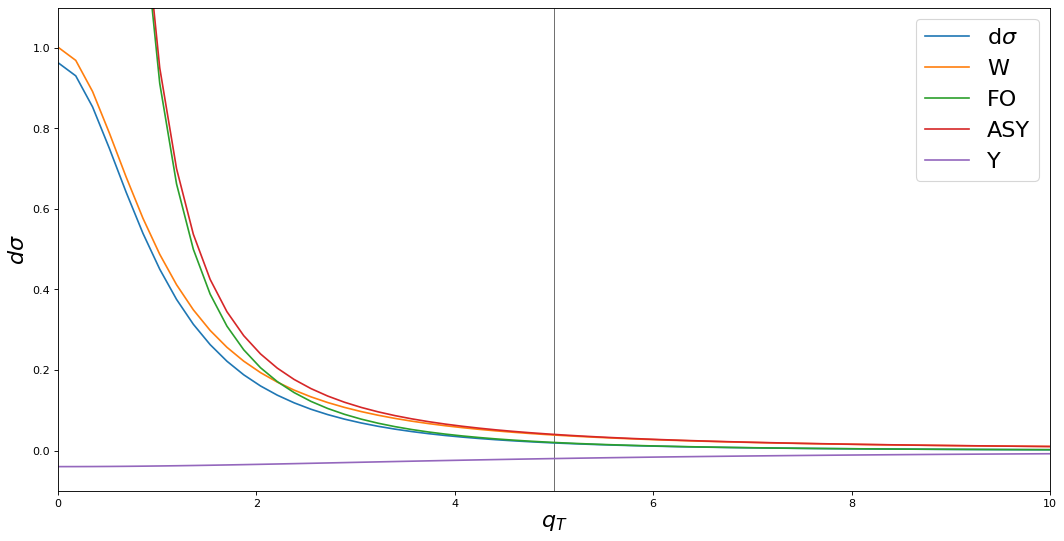

In [7]:
# plotting dsigma, W, FO, ASY, Y (matching ingredients)

f = plt.figure(num=None, figsize=(16,8), dpi=80)#, facecolor='w', edgecolor='k')

plt.plot(qTvec, dsigmavec, label=r'd$\sigma$') 
plt.plot(qTvec, Wvec, label=r'W') 
plt.plot(qTvec, FOvec, label=r'FO') 
plt.plot(qTvec, ASYvec, label=r'ASY') 
plt.plot(qTvec, Yvec, label=r'Y') 

plt.vlines(Q,-0.1,1.1,'black',linewidth=0.5)

plt.xlim(0.0,2*Q)
plt.ylim(-0.1,1.1)

plt.xlabel(r'$q_{T}$', fontsize=20)
plt.ylabel(r'$d\sigma$', fontsize=20)
plt.legend(fontsize=20)

plt.show()

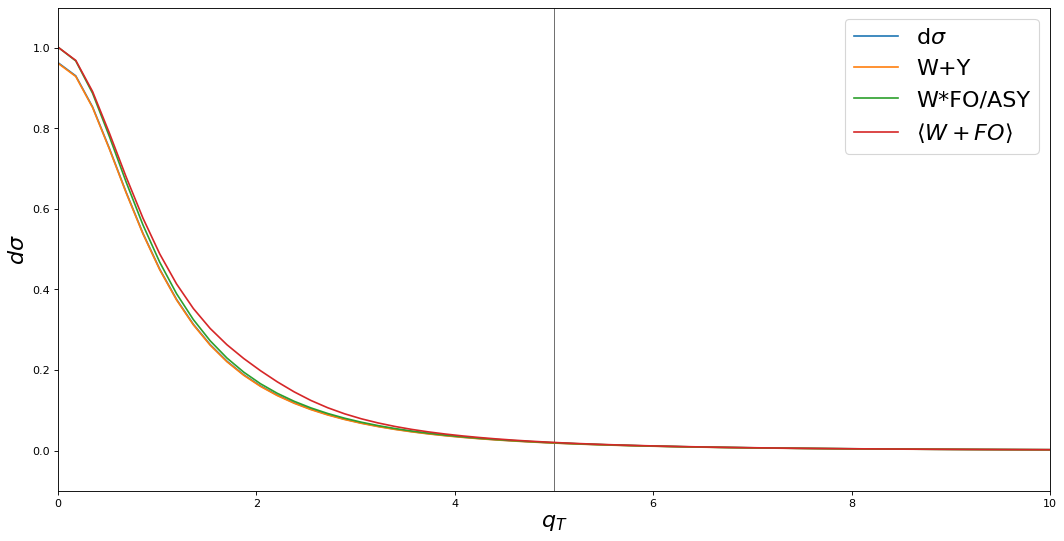

In [8]:
# plotting dsigma and matching prescriptions

f = plt.figure(num=None, figsize=(16,8), dpi=80)#, facecolor='w', edgecolor='k')

plt.plot(qTvec, dsigmavec, label=r'd$\sigma$') 
plt.plot(qTvec, additive_vec, label=r'W+Y') 
plt.plot(qTvec, multiplicative_vec, label=r'W*FO/ASY') 
plt.plot(qTvec, average_vec, label=r'$\langle W + FO \rangle$') 

plt.vlines(Q,-0.1,1.1,'black',linewidth=0.5)

plt.xlim(0.0,2*Q)
plt.ylim(-0.1,1.1)

plt.xlabel(r'$q_{T}$', fontsize=20)
plt.ylabel(r'$d\sigma$', fontsize=20)
plt.legend(fontsize=20)

plt.show()